<a href="https://colab.research.google.com/github/marcomunozq-miaad-uacj/Programacion1Semestre/blob/Programacion1Sem/Practica_8_An%C3%A1lisis_de_un_Dataset_con_Seaborn_y_Visualizaci%C3%B3n_Avanzada_Marco_Antonio_Mu%C3%B1oz_Quiroz_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica #8. Análisis de un Dataset con Seaborn y Visualización Avanzada
Alumno: Marco Antonio Muñoz Quiroz


In [62]:
# Importar librerías
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Cargar el dataset tips
df  = sns.load_dataset('tips')
df.head(15)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [52]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


Con df.info nos damos cuenta de  que no existen valores nulos

In [53]:
# tambien con el siguiente comando, el cual nos indica que no existen nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [54]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Graficos

## Mapa de Calor (Heatmap):

Objetivo: Visualizar la correlación entre las variables numéricas en el dataset.

Instrucciones: Utiliza un mapa de calor para mostrar la matriz de correlación entre las variables numéricas (total_bill, tip, size).
Asegúrate de personalizar el mapa con una paleta de colores y etiquetas en los ejes.

In [55]:
# Calculamos primeramente la matriz de correlación de todas las variables que son numericas
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


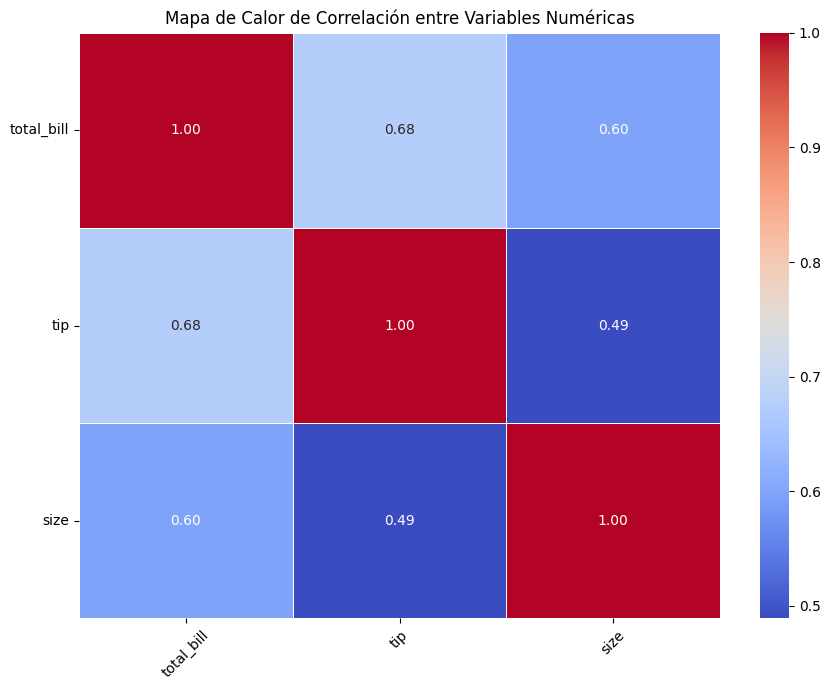

In [56]:
# Crear el mapa de calor
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Personalizar etiquetas
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Diagrama de Violín:

Objetivo: Mostrar la distribución de las propinas (tip) para diferentes días de la semana.

Instrucciones: Utiliza un diagrama de violín para comparar cómo varía la distribución de las propinas en cada uno de los días (day).
Personaliza el gráfico con colores y etiquetas adecuadas.

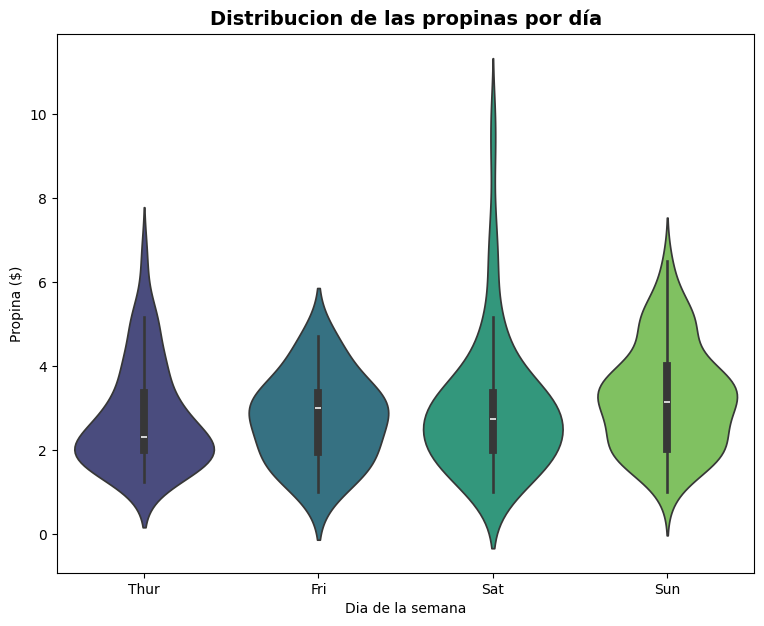

In [57]:
plt.figure(figsize=(9,7))
sns.violinplot(data=df, x="day", y="tip", hue="day", palette="viridis")
plt.title("Distribucion de las propinas por día", fontsize=14, fontweight="bold")
plt.xlabel("Dia de la semana")
plt.ylabel("Propina ($)")
plt.show()

In [58]:
# Verificamosque solo sean 4 dias de la semana lo que tiene cargado el dataset
df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

## Gráfico de dispersión (Scatter Plot):

Objetivo: Analizar la relación entre el total de la cuenta (total_bill) y la propina (tip).

Instrucciones: Crea un gráfico de dispersión con total_bill en el eje X y tip en el eje Y. Usa un color diferente para cada día de la semana.

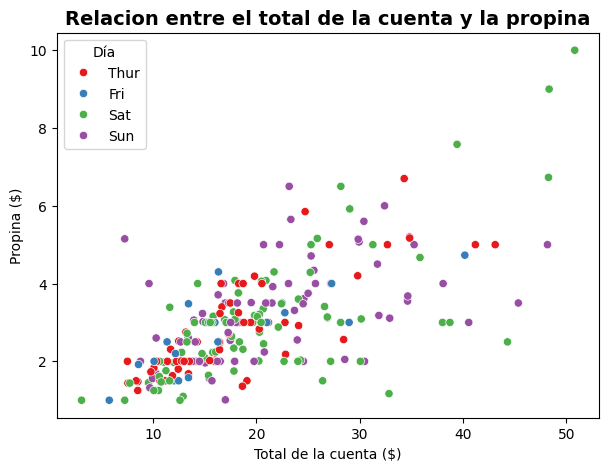

In [59]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="total_bill", y="tip", hue="day", palette="Set1")
plt.title("Relacion entre el total de la cuenta y la propina", fontsize=14, fontweight="bold")
plt.xlabel("Total de la cuenta ($)")
plt.ylabel("Propina ($)")
plt.legend(title="Día")
plt.show()

## Gráfico de barras (Bar Plot):

Objetivo: Comparar el promedio de la propina (tip) por género (sex).

Instrucciones: Utiliza un gráfico de barras para mostrar el promedio de las propinas por género (hombres y mujeres).

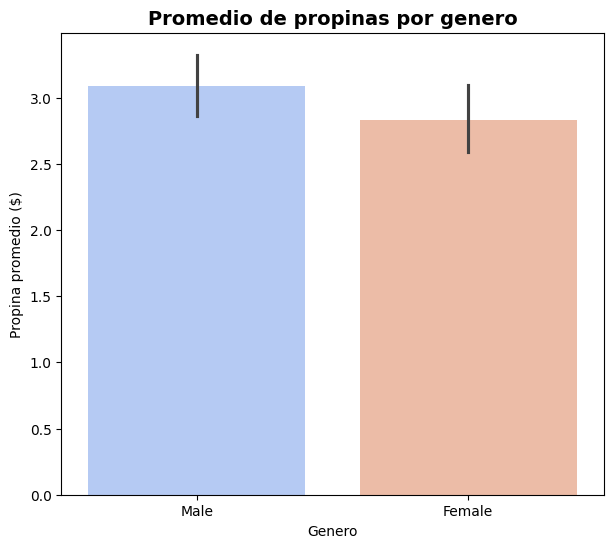

In [61]:
plt.figure(figsize=(7,6))
sns.barplot(
    data=df,
    x="sex",
    y="tip",
    hue = "sex",
    palette="coolwarm",
    legend=False,
    estimator=np.mean
)
plt.title("Promedio de propinas por genero", fontsize=14, fontweight="bold")
plt.xlabel("Genero")
plt.ylabel("Propina promedio ($)")
plt.show()